In [1]:
from spacepy import pycdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
import matplotlib
import matplotlib.colors as colors
from collections import Counter
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import math
from lmfit.models import GaussianModel
from sklearn import mixture
from matplotlib.colors import LogNorm
import cdflib
from matplotlib import ticker, cm

In [2]:
cdf = pycdf.CDF('/Users/mayur/PhD/Cluster_data/C2_CP_PEA_PITCH_SPIN_DEFlux__20040302_085105_20040302_101929_V170624.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf, start=0):
    print(i, item, cdf[i])

0 time_tags__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [1320]
1 time_tags_DeltaLower__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1320]
2 time_tags_DeltaUpper__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1320]
3 Angle_SR2phi__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1320]
4 Mode_SunpulseRephaseOffset__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
5 Mode_Sensor__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
6 Mode_SweepMode_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
7 Mode_Preset_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
8 Mode_EnergyLevelRange_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320, 2]
9 Mode_EnergyMaxMin_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1320, 2]
10 Mode_MCPlevel_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
11 Mode_DataOrigin_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
12 Mode_SweepMode_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
13 Mode_Preset_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
14 Mode_EnergyLevelRange_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux 

In [3]:
epoch = cdf[0][...]
data = cdf[26][...]
energy = cdf[20][...]
pa = cdf[23][...]

# Flux vs pitch angle #

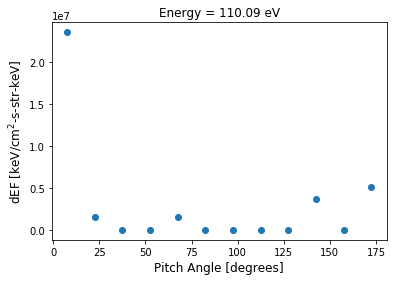

FWHM =  2
energies =  [2531.    2030.1   1621.7   1296.2   1039.9    832.28   669.21   534.17
  428.84   342.73   273.     217.89   173.09   139.08   110.09    87.464
   70.462   56.717   47.865   37.66    30.091   24.348   19.568   15.779
   12.543   10.073    8.47     7.294    6.251    5.252]


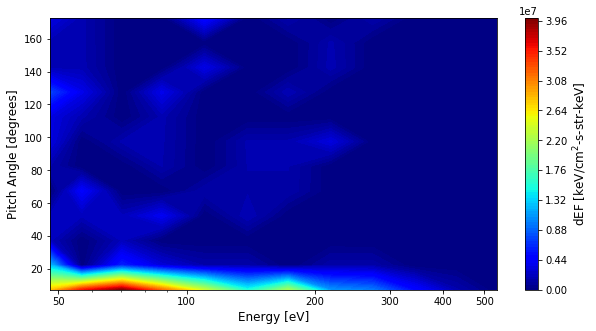

In [11]:
#3D resolution plotting:
#for j in range(16):
#        X, Y = np.meshgrid(pa, az[13])
#        fig = plt.figure(figsize=(10,5))
#        ax = plt.axes(projection='3d')
#        #ax = plt.axes()
#        D = data[13,0:len(az[13]),0:len(pa),j]
#        surf = ax.contourf(Y, X, D, 100, cmap=cm.jet)
#        cbar = fig.colorbar(surf)
#        cbar.set_label('Density')
#        ax.set_ylabel('Pitch Angle')
#        ax.set_xlabel('Azimuth')
#        ax.set_zlabel('Density')

time = 500

#PITCH_SPIN line plotting:

for n in range(14,15):
    y = data[time,0:12,n]
    #plt.plot(pa,y)
    
    t = np.polyfit(pa[0:12], y, 5)
    f = np.poly1d(t)
    pa_new = np.linspace(pa[0], pa[11], 50)
    y_new = f(pa_new)
    #plt.plot(pa[0:12],y,'o', pa_new, y_new)
    plt.scatter(pa[0:12],y)
    plt.title("Energy = " + str(energy[time,n]) + " eV")
    plt.xlabel("Pitch Angle [degrees]",fontsize=12)
    plt.ylabel("dEF [keV/cm$^{2}$-s-str-keV]",fontsize=12)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.show()
    xs = [x for x in range(50) if y_new[x] > np.max(y_new)/2.0]
    if np.mean(y_new)>0:
        fwhm = np.max(xs)-np.min(xs)
        print('FWHM = ', fwhm)
    
#PITCH_SPIN 2D plotting:
X, Y = np.meshgrid(energy[time,7:19],pa)
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
D = data[time,0:len(pa),7:19]
#surf = ax.pcolormesh((X), Y, D, cmap=cm.jet)
surf = ax.contourf((X), Y, D, 100, cmap=cm.jet)
cbar = fig.colorbar(surf)
cbar.set_label('dEF [keV/cm$^{2}$-s-str-keV]',fontsize=12)
ax.set_ylabel('Pitch Angle [degrees]',fontsize=12)
ax.set_xlabel('Energy [eV]',fontsize=12)
ax.set_xscale('log')
ax.set_xticks([50, 100, 200, 300, 400, 500])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.set_xlim(0,5)

print('energies = ', energy[time,0:30])


In [6]:
#epoch = 10,20...
ten_targets = [0,0,0,1,1,1,1,1,1,1,1,1, 0,0,0,0,1,1,1,1,1,1,1,1, 0,0,0,0,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,1,0,0,0,0,0, 0,0,0,1,0,1,1,1,1,1,1,1, 0,0,0,1,1,1,1,1,1,1,1,1, 0,0,1,1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,1,0,0,0,0, 0,0,0,1,1,1,1,1,1,1,1,1, 0,0,1,1,1,1,1,1,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,1,1,1,1, 0,0,0,1,0,1,1,1,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,0,0,0,1,1,1,1,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,1,1,1,1,1,1,1,1,1,1,1]
print(len(ten_targets))
print(ten_targets)
print(Counter(ten_targets))

240
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Counter({1: 146, 0: 94})


In [7]:
k9_targets = [0,0,0,1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,1,1,1,1, 0,0,0,1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,1,1,1,1,1,1, 0,0,0,0,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,1,1,1,1, 0,0,0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,1,1,1,1,0,0,0, 0,0,0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,1,1,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,0,0,0,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,1,0,1,1,1, 0,0,0,0,0,0,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,0,0,0,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,1,1,1,1,1, 0,0,0,0,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,1,0,1,1]
print(len(k9_targets))
print(k9_targets)
print(Counter(k9_targets))

240
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
Counter({0: 140, 1: 100})


In [8]:
#epoch = 9,19...
nine_targets = [0,1,1,1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,0,1,1,1, 0,0,0,0,0,0,0,1,1,1,1,1, 0,1,0,1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,1,1,1,1,1,1, 0,0,0,0,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,1,1,1,1,1, 0,0,0,0,0,0,0,0,1,1,1,1, 0,0,1,1,1,1,1,1,1,0,0,0, 0,0,0,1,1,1,1,1,1,1,1,1, 1,1,1,1,1,1,1,1,1,1,1,1, 0,0,1,1,1,1,1,1,1,1,1,1, 0,0,0,1,1,1,1,1,1,1,1,1, 0,1,1,0,0,1,1,1,1,1,1,1, 0,0,0,1,1,1,1,1,1,1,1,1, 1,1,1,1,0,1,0,0,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,1,1,1,1,1, 0,0,0,0,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,1,0,1,1]
print(len(nine_targets))
print(nine_targets)
print(Counter(nine_targets))

240
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
Counter({1: 149, 0: 91})


In [9]:
new_targets = [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]
print(len(new_targets))
print(new_targets)
print(Counter(new_targets))

126
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
Counter({0: 84, 1: 42})


In [10]:
fluxes = []
for i in range(20):
    for j in range(7,19):
        flux = data[i*10+10,0:12,j]
        flux[flux == -1.] = 0.
        
        #if np.max(flux)>0:
        #    flux = (flux-np.min(flux))/(np.max(flux)-np.min(flux))
            
        #flux = (flux-np.min(flux))/np.max(data[0:len(epoch),0:12,j])
        
        fluxes.append(flux)
        
#fluxes = StandardScaler().fit_transform(fluxes)
np.shape(fluxes)

(240, 12)

In [11]:
fluxes9 = []
for i in range(20):
    for j in range(7,19):
        flux = data[i*10+9,0:12,j]
        flux[flux == -1.] = 0.
        
        #if np.max(flux)>0:
        #    flux = (flux-np.min(flux))/(np.max(flux)-np.min(flux))
            
        #flux = (flux-np.min(flux))/np.max(data[0:len(epoch),0:12,j])
        
        fluxes9.append(flux)
        
#fluxes = StandardScaler().fit_transform(fluxes)
np.shape(fluxes9)

(240, 12)

In [13]:
#comparing to my labelling 
from sklearn import cluster
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

k_means = cluster.KMeans(n_clusters=4)
clusters = k_means.fit(fluxes)
#clusters9 = clusters.predict(fluxes9)

#for (i, item) in enumerate(clusters.labels_, start=0):
#    print(i, clusters.labels_[i])

clusters.labels_[clusters.labels_ == 2] = 1
clusters.labels_[clusters.labels_ == 3] = 1

confusion = metrics.confusion_matrix(ten_targets, clusters.labels_)
print(confusion)

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

print("Accuracy = ", metrics.accuracy_score(ten_targets, clusters.labels_))
print("True positive rate = ", TP / float(TP + FN))
print("True negative rate = ", TN / float(TN + FP))
print("Positive precision rate = ", TP / float(TP + FP)) #how often a positive prediction is correct
print("F1 score = ", f1_score(ten_targets, clusters.labels_)) #harmonic mean of TPR and PPR
print("Area under ROC curve = ", roc_auc_score(ten_targets, clusters.labels_)) 

[[ 94   0]
 [ 25 121]]
Accuracy =  0.8958333333333334
True positive rate =  0.8287671232876712
True negative rate =  1.0
Positive precision rate =  1.0
F1 score =  0.9063670411985019
Area under ROC curve =  0.9143835616438356


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fluxes, ten_targets, test_size=0.4, random_state=1)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 87, 0: 57})
Counter({1: 59, 0: 37})


In [15]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(x_train,y_train)
y_p = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_p))
fold_scores = cross_val_score(clf, fluxes, ten_targets, cv=10, scoring='accuracy')
print(np.mean(fold_scores))

0.6145833333333334
0.6084782608695652


In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_p = gnb.predict(x_test)
print(metrics.accuracy_score(y_test, y_p))
fold_scores = cross_val_score(gnb, fluxes, ten_targets, cv=10, scoring='accuracy')
print(np.mean(fold_scores))

0.8333333333333334
0.8852608695652174


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9375


[0.9270833333333334, 0.9270833333333334, 0.9375, 0.9166666666666666, 0.9270833333333334, 0.9166666666666666, 0.9166666666666666, 0.9270833333333334, 0.9270833333333334, 0.9270833333333334, 0.9270833333333334, 0.90625, 0.90625, 0.875, 0.875, 0.8854166666666666, 0.8854166666666666, 0.8854166666666666, 0.8854166666666666, 0.875, 0.8854166666666666, 0.875, 0.8854166666666666, 0.875, 0.875, 0.8645833333333334, 0.8541666666666666, 0.8541666666666666, 0.8645833333333334]


Text(0,0.5,'Testing Accuracy')

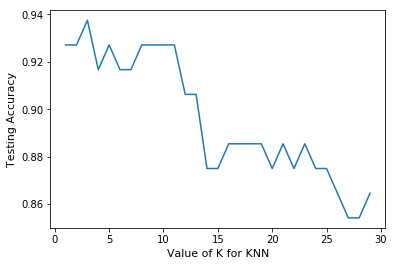

In [18]:
k_range = list(range(1, 30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN',fontsize=11)
plt.ylabel('Testing Accuracy',fontsize=11)

[0.929927536231884, 0.9342753623188406, 0.9419275362318841, 0.9509710144927535, 0.937927536231884, 0.937927536231884, 0.9419275362318841, 0.937927536231884, 0.9419275362318841, 0.9419275362318841, 0.9419275362318841, 0.938108695652174, 0.938108695652174, 0.9337608695652173, 0.9377608695652173, 0.9297608695652174, 0.938108695652174, 0.9337608695652173, 0.9337608695652173, 0.9257608695652175, 0.9257608695652175, 0.9257608695652175, 0.9257608695652175, 0.9217608695652174, 0.9217608695652174, 0.9219420289855073, 0.9219420289855073, 0.9135942028985508, 0.9172463768115942]


Text(0,0.5,'Cross-Validated Accuracy')

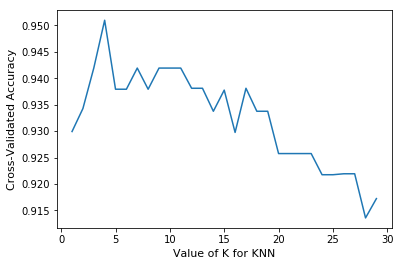

In [19]:
#k-fold cross validation for knn
k_scores = []
k_range = range(1,30)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_scores = cross_val_score(knn, fluxes, ten_targets, cv=10, scoring='accuracy')
    k_scores.append(fold_scores.mean())
print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN',fontsize=11)
plt.ylabel('Cross-Validated Accuracy',fontsize=11)

In [20]:
all_fluxes = []
all_values = []

for i in range(0,len(epoch)):
    for j in range(7,19):
        flux = data[i,0:12,j]
        
        flux[flux == -1.] = 0.
        
        all_fluxes.append(flux)
        
#all_fluxes = StandardScaler().fit_transform(all_fluxes)
print(np.shape(all_fluxes))

(15840, 12)


In [21]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(fluxes, ten_targets)
all_targets = knn.predict(all_fluxes)
print(Counter(all_targets))
print('fraction of strahl = ', Counter(all_targets)[1]/len(all_targets))

Counter({0: 7996, 1: 7844})
fraction of strahl =  0.4952020202020202


In [28]:
###### comparing to all knn predicted data
all_k_means = cluster.KMeans(n_clusters=4)
all_clusters = all_k_means.fit(all_fluxes)
all_clusters.labels_[all_clusters.labels_ == 2] = 1
all_clusters.labels_[all_clusters.labels_ == 3] = 1
print(Counter(all_clusters.labels_))

confusion = metrics.confusion_matrix(all_targets, all_clusters.labels_)
print(confusion)

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

print("Accuracy = ", metrics.accuracy_score(all_targets, all_clusters.labels_))
print("True positive rate = ", TP / float(TP + FN))
print("True negative rate = ", TN / float(TN + FP))
print("Positive precision rate = ", TP / float(TP + FP)) #how often a positive prediction is correct
print("F1 score = ", f1_score(all_targets, all_clusters.labels_)) #harmonic mean of TPR and PPR
print("Area under ROC curve = ", roc_auc_score(all_targets, all_clusters.labels_)) 

Counter({0: 8343, 1: 7497})
[[7400  596]
 [ 943 6901]]
Accuracy =  0.9028409090909091
True positive rate =  0.8797807241203468
True negative rate =  0.9254627313656828
Positive precision rate =  0.9205015339469121
F1 score =  0.8996805944853661
Area under ROC curve =  0.9026217277430149


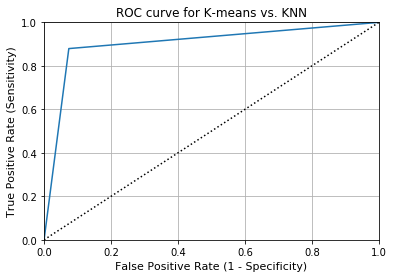

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(all_targets, all_clusters.labels_)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k:')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for K-means vs. KNN')
plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=11)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=11)
plt.grid(True)

Text(0,0.5,'knn vs kmeans')

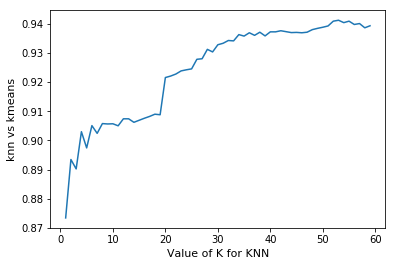

In [23]:
range_scores=[]
k_range = range(1,60)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(fluxes, ten_targets)
    range_targets = knn.predict(all_fluxes)
    range_scores.append(metrics.accuracy_score(range_targets, all_clusters.labels_))

plt.plot(k_range, range_scores)
plt.xlabel('Value of K for KNN',fontsize=11)
plt.ylabel('knn vs kmeans',fontsize=11)

In [118]:
#comparing clustering (unknown no.) to my labels
from sklearn.cluster import MeanShift
clustering = MeanShift(bandwidth=None).fit(fluxes)
print(clustering.labels_)

confusion = metrics.confusion_matrix(clusters.labels_, clustering.labels_)
TN = confusion[0, 0]
Actual_N = np.sum(confusion[0,])
Pred_N = np.sum(confusion[:,0])

print("True negative rate = ", TN/Actual_N) #how often clustering is correct when actual value is 0(halo)
print("Negative precision rate = ", TN/np.sum(confusion[:,0])) #how often a prediction of 0(halo) is correct

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 0 0 0
 0 0 0 4 4 4 2 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 3 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0
 0 4 4 0 4 4 1 0 0 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 4 1 0 0 0 0 0 0
 0 0 4 4 4 1 0 0 0 0 0 0 0 0 0 1 0 4]
True negative rate =  1.0
Negative precision rate =  0.5891089108910891


# Flux vs Energy#

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


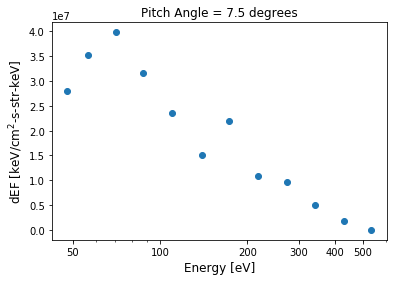

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


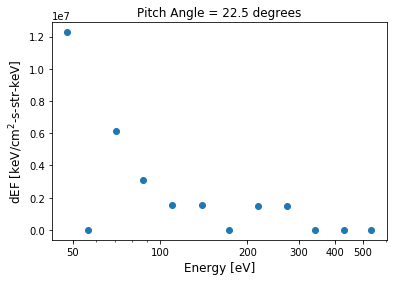

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


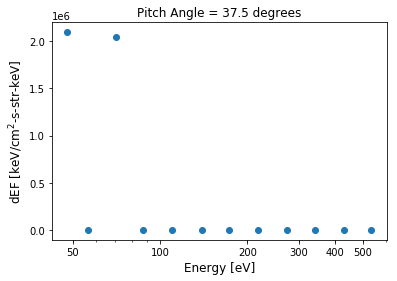

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


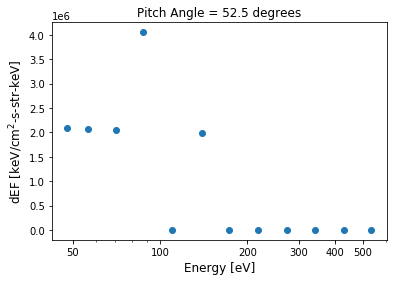

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


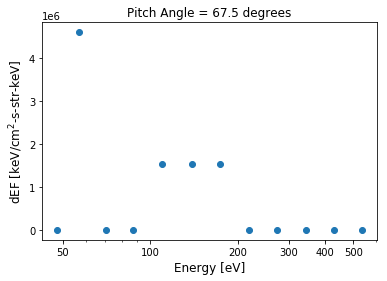

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


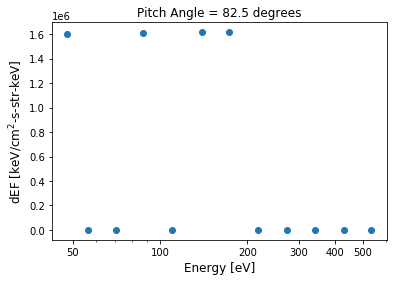

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


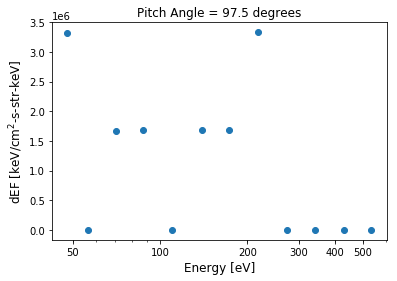

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


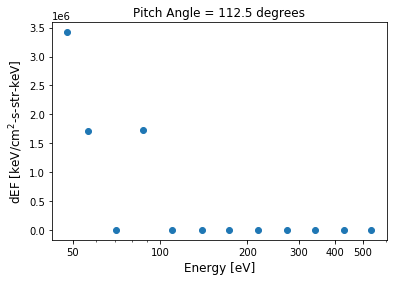

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


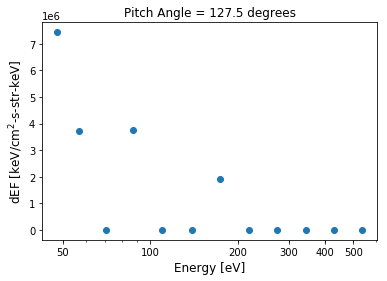

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


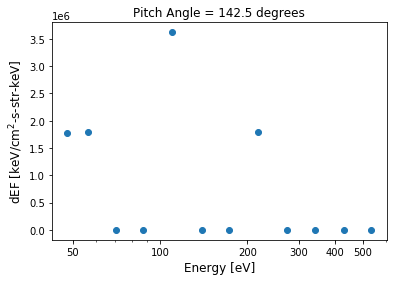

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


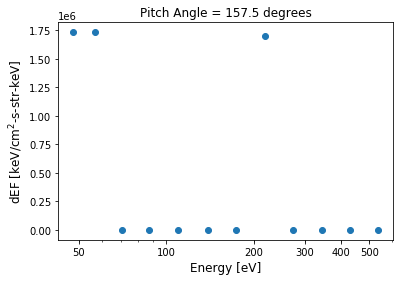

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


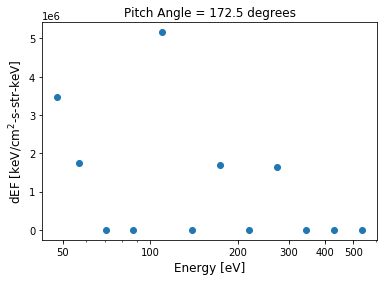

Text(0.5,0,'Energy [eV]')

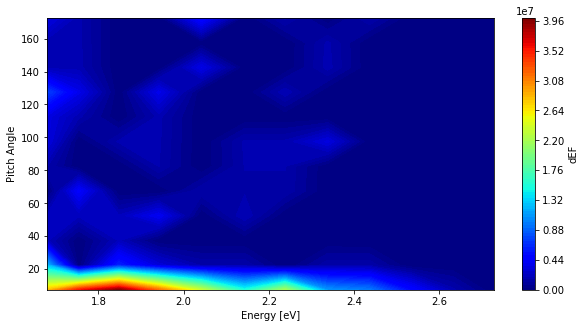

In [12]:
#PITCH_SPIN line plotting:

time = 500

for n in range(0,12):

    y1 = (data[time,n,7:19])
    #plt.scatter(np.log10(energy[time1]),y1)
    
    x1 = (energy[time,7:19])
    
    plt.scatter(x1,y1)
    plt.title("Pitch Angle = " + str(pa[n]) + " degrees")
    plt.xlabel("Energy [eV]",fontsize=12)
    plt.ylabel("dEF [keV/cm$^{2}$-s-str-keV]",fontsize=12)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xscale('log')
    ax = plt.axes()
    ax.set_xticks([50,100,200,300,400,500])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.show()
      
#PITCH_SPIN 2D plotting:
X, Y = np.meshgrid(energy[time,7:19],pa)
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
D = data[time,0:len(pa),7:19]
surf = ax.contourf(np.log10(X), Y, D, 100, cmap=cm.jet)
cbar = fig.colorbar(surf)
cbar.set_label('dEF')
ax.set_ylabel('Pitch Angle')
ax.set_xlabel('Energy [eV]')
#ax.set_xlim(0,5)

In [30]:
#halo = 0, strahl = 1
strahl_targets = [1,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,1,1,0, 1,0,0,0,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,0,1,1,0, 1,0,0,0,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,0,1,0,0]
print(len(strahl_targets)) 
print(Counter(strahl_targets))
print('fraction of strahl = ', Counter(strahl_targets)[1]/len(strahl_targets))

240
Counter({0: 199, 1: 41})
fraction of strahl =  0.17083333333333334


In [31]:
#halo = 0, strahl = 1
strahl_targets9 = [1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0]
print(len(strahl_targets9)) 
print(Counter(strahl_targets9))
print('fraction of strahl = ', Counter(strahl_targets9)[1]/len(strahl_targets9))

240
Counter({0: 198, 1: 42})
fraction of strahl =  0.175


In [32]:
fluxes_e = []

for i in range(20):
    for j in range(0,12):
        flux_e = data[i*10+10,j,7:19]
        flux_e[flux_e == -1.] = 0.
        fluxes_e.append(flux_e)
        
#fluxes_e = StandardScaler().fit_transform(fluxes_e)
np.shape(fluxes_e)

(240, 12)

In [33]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2)
cluster_e = k_means.fit(fluxes_e)

#for (i, item) in enumerate(cluster_e.labels_, start=0):
#    print(i, cluster_e.labels_[i])

print('fraction of strahl = ', Counter(cluster_e.labels_)[1]/len(cluster_e.labels_)) #from kmeans

confusion = metrics.confusion_matrix(strahl_targets, cluster_e.labels_)
print(confusion)

TH = confusion[0, 0]
FS = confusion[0, 1]
FH = confusion[1, 0]
TS = confusion[1, 1]

print("Accuracy = ", metrics.accuracy_score(strahl_targets, cluster_e.labels_))
print("Strahl recall rate = ", TS / float(TS + FH))
print("Strahl precision rate = ", TS / float(TS + FS)) #how often a strahl prediction is correct
print("Halo recall rate = ", TH / float(TH + FS))
print("Halo precision rate = ", TH / float(TH + FH)) #how often a halo prediction is correct
print("F1 score = ", f1_score(strahl_targets, cluster_e.labels_)) #harmonic mean of TPR and PPR
print("Area under ROC curve = ", roc_auc_score(strahl_targets, cluster_e.labels_)) 

fraction of strahl =  0.15833333333333333
[[198   1]
 [  4  37]]
Accuracy =  0.9791666666666666
Strahl recall rate =  0.9024390243902439
Strahl precision rate =  0.9736842105263158
Halo recall rate =  0.9949748743718593
Halo precision rate =  0.9801980198019802
F1 score =  0.9367088607594938
Area under ROC curve =  0.9487069493810515


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fluxes_e, strahl_targets, test_size=0.4, random_state=1)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 116, 1: 28})
Counter({0: 83, 1: 13})


In [35]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(x_train,y_train)
y_p = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_p))
fold_scores = cross_val_score(clf, fluxes_e, strahl_targets, cv=10, scoring='accuracy')
print(np.mean(fold_scores))

0.8645833333333334
0.8292753623188405


In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_p = gnb.predict(x_test)
print(metrics.accuracy_score(y_test, y_p))
fold_scores = cross_val_score(gnb, fluxes_e, strahl_targets, cv=10, scoring='accuracy')
print(np.mean(fold_scores))

0.9166666666666666
0.9375


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9583333333333334


[0.9583333333333334, 0.96875, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.96875, 0.9583333333333334, 0.96875, 0.9583333333333334, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.9583333333333334, 0.96875, 0.96875, 0.96875, 0.96875]


Text(0,0.5,'Testing Accuracy')

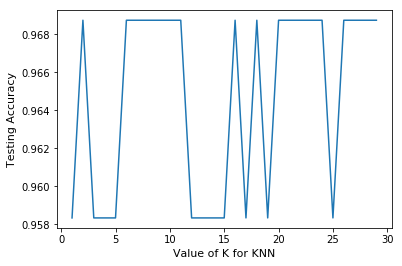

In [38]:
k_range = list(range(1, 30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN',fontsize=11)
plt.ylabel('Testing Accuracy',fontsize=11)

[0.9539710144927536, 0.9581376811594204, 0.9708188405797102, 0.974985507246377, 0.9749855072463769, 0.974985507246377, 0.9749855072463769, 0.9708188405797102, 0.9708188405797102, 0.9708188405797102, 0.9708188405797102, 0.974985507246377, 0.9708188405797102, 0.974985507246377, 0.9708188405797102, 0.974985507246377, 0.9708188405797102, 0.974985507246377, 0.974985507246377, 0.974985507246377, 0.974985507246377, 0.974985507246377, 0.974985507246377, 0.9708188405797102, 0.974985507246377, 0.9666521739130435, 0.9666521739130435, 0.9666521739130435, 0.9666521739130435]


Text(0,0.5,'Cross-Validated Accuracy')

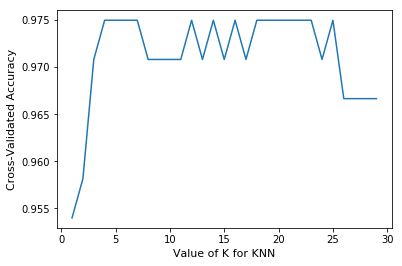

In [39]:
#k-fold cross validation for knn
k_scores = []
k_range = range(1,30)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_scores = cross_val_score(knn, fluxes_e, strahl_targets, cv=10, scoring='accuracy')
    k_scores.append(fold_scores.mean())
print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN',fontsize=11)
plt.ylabel('Cross-Validated Accuracy',fontsize=11)

In [40]:
all_fluxes_e = []

for i in range(len(epoch)):
    for j in range(0,12):
        flux_e = data[i,j,7:19]
        flux_e[flux_e == -1.] = 0.
        all_fluxes_e.append(flux_e)
        
np.shape(all_fluxes_e)

(15840, 12)

In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(fluxes_e, strahl_targets)
all_targets_e = knn.predict(all_fluxes_e)
print(Counter(all_targets_e))
print('fraction of strahl = ', Counter(all_targets_e)[1]/len(all_targets_e))

Counter({0: 14420, 1: 1420})
fraction of strahl =  0.08964646464646464


In [42]:
###### comparing to all knn predicted data
all_k_means_e = cluster.KMeans(n_clusters=2)
all_clusters_e = all_k_means_e.fit(all_fluxes_e)
print(Counter(all_clusters_e.labels_))

confusion = metrics.confusion_matrix(all_targets_e, all_clusters_e.labels_)
print(confusion)

print('fraction of strahl = ', Counter(all_clusters_e.labels_)[1]/len(all_clusters_e.labels_)) #from kmeans

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

print("Accuracy = ", metrics.accuracy_score(all_targets_e, all_clusters_e.labels_))
print("True positive rate = ", TP / float(TP + FN))
print("True negative rate = ", TN / float(TN + FP))
print("Positive precision rate = ", TP / float(TP + FP)) #how often a positive prediction is correct
print("F1 score = ", f1_score(all_targets_e, all_clusters_e.labels_)) #harmonic mean of TPR and PPR
print("Area under ROC curve = ", roc_auc_score(all_targets_e, all_clusters_e.labels_)) 

Counter({0: 14036, 1: 1804})
[[14026   394]
 [   10  1410]]
fraction of strahl =  0.11388888888888889
Accuracy =  0.9744949494949495
True positive rate =  0.9929577464788732
True negative rate =  0.9726768377253814
Positive precision rate =  0.7815964523281597
F1 score =  0.8746898263027296
Area under ROC curve =  0.9828172921021273


Text(0,0.5,'knn vs kmeans')

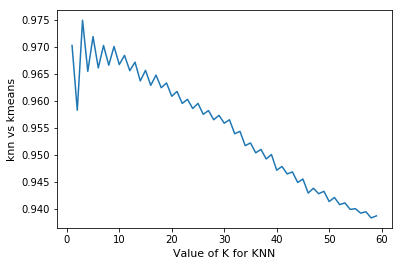

In [87]:
range_scores=[]
k_range = range(1,60)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(fluxes_e, strahl_targets)
    range_targets = knn.predict(all_fluxes_e)
    range_scores.append(metrics.accuracy_score(range_targets, all_clusters_e.labels_))

plt.plot(k_range, range_scores)
plt.xlabel('Value of K for KNN',fontsize=11)
plt.ylabel('knn vs kmeans',fontsize=11)

In [93]:
#comparing clustering (unknown no.) to my labels
from sklearn.cluster import MeanShift
clustering_e = MeanShift(bandwidth=None).fit(fluxes_e)
print(clustering_e.labels_)

confusion = metrics.confusion_matrix(strahl_targets, clustering_e.labels_)
TN = confusion[0, 0]
Actual_N = np.sum(confusion[0,])
Pred_N = np.sum(confusion[:,0])

print("True negative rate = ", TN/Actual_N) #how often clustering is correct when actual value is 0(halo)
print("Negative precision rate = ", TN/np.sum(confusion[:,0])) #how often a prediction of 0(halo) is correct

[ 2  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
 20  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0
  3  0  0  0  0  0  0  0  0  1  0  1 12  0  0  0  0  0  0  0  0  1  1  1
  2  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
 18  0  0  0  0  0  0  0  0  1 10 11 21  0  0  0  0  0  0  0  0  1  6  9
  2  0  0  0  0  0  0  0  0  0  0  0  3  4  0  0  0  0  0  0  0  4 19  3
 21  0  0  0  0  0  0  0  0  0  1  0 15  0  0  0  0  0  0  0  0  0  0  0
 14  0  0  0  0  0  0  0  0 13  1  0  3  0  0  0  0  0  0  0  0  1 16 17
  4  0  0  0  0  0  0  0  1  1  2  1  2  0  0  0  0  0  0  0  0  4  4  0
  3  0  0  0  0  0  0  0  0  1  7  8  5  0  0  0  0  0  0  0  0  4  0  0]
True negative rate =  0.949748743718593
Negative precision rate =  1.0


# Pitch angle vs energy sample table #

In [43]:
pa_sample = np.array(np.array_split(clusters.labels_,len(clusters.labels_)/12))

In [44]:
energy_sample = np.array(np.array_split(cluster_e.labels_,len(cluster_e.labels_)/12))

In [45]:
labels_sample = []
for k in range(20):

    for i in range(12):
        for j in range(12):
            if energy_sample[k,i] and pa_sample[k,j] == 1:
                strahl = 1
            else:
                strahl = 0
            labels_sample.append(strahl)
            
labels_sample = np.array(np.array_split(labels_sample,20))
print(np.shape(labels_sample))

test_labels = []
for k in range(20):
    test_labels.append(np.array(np.array_split(labels_sample[k],12)))
    
print(np.shape(test_labels))

(20, 144)
(20, 12, 12)


# Pitch angle vs energy complete table

In [46]:
#K-means classifications
pa_all = np.array(np.array_split(all_clusters.labels_,len(all_clusters.labels_)/12))
energy_all = np.array(np.array_split(all_clusters_e.labels_,len(all_clusters_e.labels_)/12))

In [47]:
#KNN classifications
#pa_all = np.array(np.array_split(all_targets,len(all_targets)/12))
#energy_all = np.array(np.array_split(all_targets_e,len(all_targets_e)/12))

In [48]:
labels_all = []
for k in range(len(epoch)):

    for i in range(12):
        for j in range(12):
            if energy_all[k,i] and pa_all[k,j] == 1:
                strahl = 1
            else:
                strahl = 0
            labels_all.append(strahl)
            
labels_all = np.array(np.array_split(labels_all,len(epoch)))
print(np.shape(labels_all))

final_labels = []
for k in range(len(epoch)):
    final_labels.append(np.array(np.array_split(labels_all[k],12)))
    
final_labels = np.array(final_labels)
print(np.shape(final_labels))

(1320, 144)
(1320, 12, 12)


In [49]:
print(final_labels[440])#each row = different pa with 0 degrees at top, each column = different energy higher to lower

unique, counts = np.unique(final_labels, return_counts=True)
dict(zip(unique, counts)) #number of 1s and 0s across all times

[[0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


{0: 177146, 1: 12934}

Note: convert dEF to number density by using eq. (3.81), p. 189 in "Calibration of particle instruments in space physics"

In [50]:
halo_count = []
strahl_count = []
gaus_count = []

for k in range(len(epoch)):
    print(k)
    for i in range(12):
        for j in range(12):
            if final_labels[k,i,j] == 0:
                #halo_count.append(data[k,i,7+j])
                halo_count.append(data[k,i,7+j]*((energy[k,7+j]-energy[k,7+(j+1)])/1000)/((energy[k,7+j]/1000)**1.5))
            else:
                #strahl_count.append(data[k,i,7+j])
                strahl_count.append(data[k,i,7+j]*((energy[k,7+j]-energy[k,7+(j+1)])/1000)/((energy[k,7+j]/1000)**1.5))
            
        if final_labels[k,i,11] == 1:
            x = np.log10(energy[k,7:19])
            y = data[k,i,7:19]

            n = len(x)                          #the number of data
            mean = sum(x * y) / sum(y)
            sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

            def gaus(x,a,x0,sigma):
                return a*np.exp(-(x-x0)**2/(2*sigma**2))
            #print(k)

            popt,pcov = curve_fit(gaus,x,y,p0=[np.max(y),mean,sigma],maxfev=1000000)

            x_scale = np.log10(energy[k,19:25])
            
            if gaus(np.log10(energy[k,20]),*popt) < gaus(np.log10(energy[k,19]),*popt):
                for n in range(19,21):
                    #gaus_count.append(gaus(np.log10(energy[k,n]),*popt))
                    gaus_count.append(gaus(np.log10(energy[k,n]),*popt)*((energy[k,n]-energy[k,n+1])/1000)/((energy[k,n]/1000)**1.5))
            
                

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:801: RuntimeWarning: overflow encountered in multiply
  pcov = pcov * s_sq


348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597


In [51]:
print(np.shape(strahl_count))
print(np.shape(halo_count))
print(np.shape(gaus_count))

(12934,)
(177146,)
(2972,)


In [52]:
all_strahl_count = [*strahl_count,*gaus_count]
np.shape(all_strahl_count)

(15906,)

In [53]:
extra_halo = []
for k in range(len(epoch)):
    for i in range(12):
        for j in range(2,7):
            #extra_halo.append(data[k,i,j])
            extra_halo.append(data[k,i,j]*((energy[k,j]-energy[k,(j+1)])/1000)/(energy[k,j]/1000)**1.5)

all_halo_count = [*halo_count,*extra_halo]

In [54]:
core_count = []
for k in range(len(epoch)):
    for i in range(12):
        for j in range(19,26):
            #core_count.append(data[k,i,j])
            core_count.append(data[k,i,j]*((energy[k,j]-energy[k,(j+1)])/1000)/(energy[k,j]/1000)**1.5)
total_core = np.sum(core_count)-np.sum(gaus_count)

In [55]:
supra_count = []
for k in range(len(epoch)):
    for i in range(12):
        for j in range(2,19):
            #core_count.append(data[k,i,j])
            supra_count.append(data[k,i,j]*((energy[k,j]-energy[k,(j+1)])/1000)/(energy[k,j]/1000)**1.5)
total_supra = np.sum(supra_count)+np.sum(gaus_count)

In [56]:
#strahl/halo ratio in suprathermal range
total_strahl = (np.sum(strahl_count)-len(strahl_count)*np.mean(halo_count))
total_halo = (np.sum(all_halo_count)+(len(strahl_count)*np.mean(halo_count)))

In [57]:
print(total_strahl/total_halo)
print(total_supra/total_core)

0.7927882044058969
0.10752960760488


In [58]:
print(energy[0,0:30])

[2531.    2030.1   1621.7   1296.2   1039.9    832.28   669.21   534.17
  428.84   342.73   273.     217.89   173.09   139.08   110.09    87.464
   70.462   56.717   47.865   37.66    30.091   24.348   19.568   15.779
   12.543   10.073    8.47     7.294    6.251    5.252]


# 3D plot of k-means labelling

In [60]:
%matplotlib qt
X, Y = np.meshgrid(np.log10(energy[0:10,7:19]),pa)
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111,projection='3d')
#ax.scatter(np.log10(X),Y,data[0:10,0:12,7:19],c='r')

for k in range(100):
    for i in range(12):
        for j in range(12):
            if final_labels[k*10,i,j] == 0:
                h = ax.scatter(np.log10(energy[k*10,j+7]),pa[i],data[k*10,i,j+7],c='r')
            else:
                s = ax.scatter(np.log10(energy[k*10,j+7]),pa[i],data[k*10,i,j+7],c='b')
                
ax.legend((h,s),('halo','strahl'))
ax.set_xticks([1.7,2.0,2.3,2.5,2.6,2.7])
ax.set_xticklabels([50,100,200,300,400,500]) #swap log base 10 values of 50,100 etc to 50,100 etc
ax.set_ylabel('Pitch Angle [degrees]')
ax.set_xlabel('Energy [eV]')
ax.set_zlabel('dEF [keV/cm$^{2}$-s-str-keV]')
plt.show()

# Medium Wind

In [56]:
cdf2 = pycdf.CDF('/Users/mayur/PhD/Cluster_data/C2_CP_PEA_PITCH_SPIN_DEFlux__20030130_003800_20030130_013500_V170624.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf2, start=0):
    print(i, item, cdf2[i])

0 time_tags__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [854]
1 time_tags_DeltaLower__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [854]
2 time_tags_DeltaUpper__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [854]
3 Angle_SR2phi__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [854]
4 Mode_SunpulseRephaseOffset__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
5 Mode_Sensor__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
6 Mode_SweepMode_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
7 Mode_Preset_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
8 Mode_EnergyLevelRange_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854, 2]
9 Mode_EnergyMaxMin_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [854, 2]
10 Mode_MCPlevel_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
11 Mode_DataOrigin_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
12 Mode_SweepMode_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
13 Mode_Preset_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
14 Mode_EnergyLevelRange_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854,

In [57]:
epoch2 = cdf2[0][...]
data2 = cdf2[26][...]
energy2 = cdf2[20][...]
pa2 = cdf2[23][...]

In [58]:
all_fluxes2 = []
all_values2 = []

for i in range(0,len(epoch2)):
    for j in range(9,21):
        flux2 = data2[i,0:12,j]
        
        #if np.max(flux2)>0:
        #    flux2 = (flux2-np.min(flux2))/(np.max(flux2)-np.min(flux2))
        
        flux2[flux2 == -1.] = 0.
        
        all_fluxes2.append(flux2)
        
#all_fluxes2 = StandardScaler().fit_transform(all_fluxes2)
print(np.shape(all_fluxes2))

(10248, 12)


In [59]:
all_clusters2 = all_k_means.predict(all_fluxes2)
all_clusters2[all_clusters2 == 2] = 1
all_clusters2[all_clusters2 == 3] = 1
print(Counter(all_clusters2))

for (i, item) in enumerate(all_clusters2, start=0):
    print(i, all_clusters2[i])

Counter({0: 5807, 1: 4441})
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 1
10 1
11 1
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 1
21 1
22 1
23 1
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 1
34 1
35 1
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 1
46 1
47 1
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 1
57 1
58 1
59 1
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 1
70 1
71 1
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 1
82 1
83 1
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 1
95 1
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 1
106 1
107 1
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 1
117 1
118 1
119 1
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 1
130 1
131 1
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 1
141 1
142 1
143 1
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 1
154 1
155 1
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 1
167 1
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 1
178 1
179 1
18

1431 0
1432 0
1433 0
1434 0
1435 1
1436 1
1437 1
1438 1
1439 1
1440 0
1441 0
1442 0
1443 0
1444 0
1445 0
1446 0
1447 1
1448 1
1449 1
1450 1
1451 1
1452 0
1453 0
1454 0
1455 0
1456 0
1457 0
1458 0
1459 1
1460 1
1461 1
1462 1
1463 1
1464 0
1465 0
1466 0
1467 0
1468 0
1469 0
1470 0
1471 1
1472 1
1473 1
1474 1
1475 1
1476 0
1477 0
1478 0
1479 0
1480 0
1481 0
1482 1
1483 1
1484 1
1485 1
1486 1
1487 1
1488 0
1489 0
1490 0
1491 0
1492 0
1493 0
1494 0
1495 1
1496 1
1497 1
1498 1
1499 1
1500 0
1501 0
1502 0
1503 0
1504 0
1505 0
1506 0
1507 1
1508 1
1509 1
1510 1
1511 1
1512 0
1513 0
1514 0
1515 0
1516 0
1517 0
1518 0
1519 1
1520 1
1521 1
1522 1
1523 1
1524 0
1525 0
1526 0
1527 0
1528 0
1529 0
1530 1
1531 1
1532 1
1533 1
1534 1
1535 1
1536 0
1537 0
1538 0
1539 0
1540 0
1541 0
1542 0
1543 1
1544 1
1545 1
1546 1
1547 1
1548 0
1549 0
1550 0
1551 0
1552 0
1553 0
1554 0
1555 1
1556 1
1557 1
1558 1
1559 1
1560 0
1561 0
1562 0
1563 0
1564 0
1565 0
1566 1
1567 1
1568 1
1569 1
1570 1
1571 1
1572 0
1573 0

3431 1
3432 0
3433 0
3434 0
3435 0
3436 0
3437 0
3438 1
3439 1
3440 1
3441 1
3442 1
3443 1
3444 0
3445 0
3446 0
3447 0
3448 0
3449 0
3450 1
3451 1
3452 1
3453 1
3454 1
3455 1
3456 0
3457 0
3458 0
3459 0
3460 0
3461 0
3462 1
3463 1
3464 1
3465 1
3466 1
3467 1
3468 0
3469 0
3470 0
3471 0
3472 0
3473 0
3474 1
3475 1
3476 1
3477 1
3478 1
3479 1
3480 0
3481 0
3482 0
3483 0
3484 0
3485 0
3486 1
3487 1
3488 1
3489 1
3490 1
3491 1
3492 0
3493 0
3494 0
3495 0
3496 0
3497 0
3498 1
3499 1
3500 1
3501 1
3502 1
3503 1
3504 0
3505 0
3506 0
3507 0
3508 0
3509 0
3510 0
3511 1
3512 1
3513 1
3514 1
3515 1
3516 0
3517 0
3518 0
3519 0
3520 0
3521 0
3522 0
3523 1
3524 1
3525 1
3526 1
3527 1
3528 0
3529 0
3530 0
3531 0
3532 0
3533 0
3534 0
3535 1
3536 1
3537 1
3538 1
3539 1
3540 0
3541 0
3542 0
3543 0
3544 0
3545 0
3546 0
3547 1
3548 1
3549 1
3550 1
3551 1
3552 0
3553 0
3554 0
3555 0
3556 0
3557 0
3558 1
3559 1
3560 1
3561 1
3562 1
3563 1
3564 0
3565 0
3566 0
3567 0
3568 0
3569 0
3570 1
3571 1
3572 1
3573 1

5180 1
5181 1
5182 1
5183 1
5184 0
5185 0
5186 0
5187 0
5188 0
5189 0
5190 1
5191 1
5192 1
5193 1
5194 1
5195 1
5196 0
5197 0
5198 0
5199 0
5200 0
5201 0
5202 0
5203 1
5204 1
5205 1
5206 1
5207 1
5208 0
5209 0
5210 0
5211 0
5212 0
5213 0
5214 0
5215 1
5216 1
5217 1
5218 1
5219 1
5220 0
5221 0
5222 0
5223 0
5224 0
5225 0
5226 0
5227 1
5228 1
5229 1
5230 1
5231 1
5232 0
5233 0
5234 0
5235 0
5236 0
5237 0
5238 1
5239 1
5240 1
5241 1
5242 1
5243 1
5244 0
5245 0
5246 0
5247 0
5248 0
5249 0
5250 0
5251 1
5252 1
5253 1
5254 1
5255 1
5256 0
5257 0
5258 0
5259 0
5260 0
5261 0
5262 0
5263 1
5264 1
5265 1
5266 1
5267 1
5268 0
5269 0
5270 0
5271 0
5272 0
5273 0
5274 0
5275 1
5276 1
5277 1
5278 1
5279 1
5280 0
5281 0
5282 0
5283 0
5284 0
5285 0
5286 1
5287 1
5288 1
5289 1
5290 1
5291 1
5292 0
5293 0
5294 0
5295 0
5296 0
5297 0
5298 1
5299 1
5300 1
5301 1
5302 1
5303 1
5304 0
5305 0
5306 0
5307 0
5308 0
5309 0
5310 1
5311 1
5312 1
5313 1
5314 1
5315 1
5316 0
5317 0
5318 0
5319 0
5320 0
5321 0
5322 0

6930 1
6931 1
6932 1
6933 1
6934 1
6935 1
6936 0
6937 0
6938 0
6939 0
6940 0
6941 0
6942 0
6943 1
6944 1
6945 1
6946 1
6947 1
6948 0
6949 0
6950 0
6951 0
6952 0
6953 0
6954 0
6955 1
6956 1
6957 1
6958 1
6959 1
6960 0
6961 0
6962 0
6963 0
6964 0
6965 0
6966 1
6967 1
6968 1
6969 1
6970 1
6971 1
6972 0
6973 0
6974 0
6975 0
6976 0
6977 0
6978 1
6979 1
6980 1
6981 1
6982 1
6983 1
6984 0
6985 0
6986 0
6987 0
6988 0
6989 0
6990 1
6991 1
6992 1
6993 1
6994 1
6995 1
6996 0
6997 0
6998 0
6999 0
7000 0
7001 0
7002 1
7003 1
7004 1
7005 1
7006 1
7007 1
7008 0
7009 0
7010 0
7011 0
7012 0
7013 0
7014 1
7015 1
7016 1
7017 1
7018 1
7019 1
7020 0
7021 0
7022 0
7023 0
7024 0
7025 0
7026 1
7027 1
7028 1
7029 1
7030 1
7031 1
7032 0
7033 0
7034 0
7035 0
7036 0
7037 0
7038 0
7039 1
7040 1
7041 1
7042 1
7043 1
7044 0
7045 0
7046 0
7047 0
7048 0
7049 0
7050 1
7051 1
7052 1
7053 1
7054 1
7055 1
7056 0
7057 0
7058 0
7059 0
7060 0
7061 0
7062 0
7063 1
7064 1
7065 1
7066 1
7067 1
7068 0
7069 0
7070 0
7071 0
7072 0

8429 0
8430 1
8431 1
8432 1
8433 1
8434 1
8435 1
8436 0
8437 0
8438 0
8439 0
8440 0
8441 0
8442 0
8443 1
8444 1
8445 1
8446 1
8447 1
8448 0
8449 0
8450 0
8451 0
8452 0
8453 0
8454 1
8455 1
8456 1
8457 1
8458 1
8459 1
8460 0
8461 0
8462 0
8463 0
8464 0
8465 0
8466 1
8467 1
8468 1
8469 1
8470 1
8471 1
8472 0
8473 0
8474 0
8475 0
8476 0
8477 0
8478 0
8479 1
8480 1
8481 1
8482 1
8483 1
8484 0
8485 0
8486 0
8487 0
8488 0
8489 0
8490 1
8491 1
8492 1
8493 1
8494 1
8495 1
8496 0
8497 0
8498 0
8499 0
8500 0
8501 0
8502 0
8503 1
8504 1
8505 1
8506 1
8507 1
8508 0
8509 0
8510 0
8511 0
8512 0
8513 0
8514 0
8515 1
8516 1
8517 1
8518 1
8519 1
8520 0
8521 0
8522 0
8523 0
8524 0
8525 0
8526 0
8527 1
8528 1
8529 1
8530 1
8531 1
8532 0
8533 0
8534 0
8535 0
8536 0
8537 0
8538 0
8539 1
8540 1
8541 1
8542 1
8543 1
8544 0
8545 0
8546 0
8547 0
8548 0
8549 0
8550 0
8551 1
8552 1
8553 1
8554 1
8555 1
8556 0
8557 0
8558 0
8559 0
8560 0
8561 0
8562 0
8563 1
8564 1
8565 1
8566 1
8567 1
8568 0
8569 0
8570 0
8571 0

10179 0
10180 0
10181 0
10182 0
10183 0
10184 1
10185 1
10186 1
10187 1
10188 0
10189 0
10190 0
10191 0
10192 0
10193 0
10194 0
10195 1
10196 1
10197 1
10198 1
10199 1
10200 0
10201 0
10202 0
10203 0
10204 0
10205 0
10206 0
10207 1
10208 1
10209 1
10210 1
10211 1
10212 0
10213 0
10214 0
10215 0
10216 0
10217 0
10218 0
10219 1
10220 1
10221 1
10222 1
10223 1
10224 0
10225 0
10226 0
10227 0
10228 0
10229 0
10230 0
10231 0
10232 1
10233 1
10234 1
10235 1
10236 0
10237 0
10238 0
10239 0
10240 0
10241 0
10242 1
10243 1
10244 1
10245 1
10246 1
10247 1


In [60]:
all_fluxes_e2 = []

for i in range(len(epoch2)):
    for j in range(0,12):
        flux_e2 = data2[i,j,9:21]
        flux_e2[flux_e2 == -1.] = 0.
        all_fluxes_e2.append(flux_e2)
        
#all_fluxes_e2 = StandardScaler().fit_transform(all_fluxes_e2)
np.shape(all_fluxes_e2)

(10248, 12)

In [61]:
all_clusters_e2 = all_k_means_e.predict(all_fluxes_e2)
print(Counter(all_clusters_e2))

#for (i, item) in enumerate(all_clusters_e2, start=0):
#    print(i, all_clusters_e2[i])

Counter({0: 8560, 1: 1688})


In [62]:
pa_all2 = np.array(np.array_split(all_clusters2,len(all_clusters2)/12))

In [63]:
energy_all2 = np.array(np.array_split(all_clusters_e2,len(all_clusters_e2)/12))

In [64]:
labels_all2 = []
for k in range(len(epoch2)):

    for i in range(12):
        for j in range(12):
            if energy_all2[k,i] and pa_all2[k,j] == 1:
                strahl2 = 1
            else:
                strahl2 = 0
            labels_all2.append(strahl2)
            
labels_all2 = np.array(np.array_split(labels_all2,len(epoch2)))
print(np.shape(labels_all2))

final_labels2 = []
for k in range(len(epoch2)):
    final_labels2.append(np.array(np.array_split(labels_all2[k],12)))
    
final_labels2 = np.array(final_labels2)
print(np.shape(final_labels2))

(854, 144)
(854, 12, 12)


In [65]:
print(final_labels2[374])#each row = different pa with 0 degrees at top, each column = different energy higher to lower

unique2, counts2 = np.unique(final_labels2, return_counts=True)
dict(zip(unique2, counts2)) #number of 1s and 0s across all times

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]]


{0: 113708, 1: 9268}

In [66]:
b = np.loadtxt('test1.txt', dtype=int)

In [68]:
a = final_labels2.ravel()
confusion = metrics.confusion_matrix(a, b)
print(confusion)

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

print("Accuracy = ", metrics.accuracy_score(a, b))
print("True positive rate = ", TP / float(TP + FN))
print("True negative rate = ", TN / float(TN + FP))
print("Positive precision rate = ", TP / float(TP + FP)) #how often a positive prediction is correct 

[[110615   3093]
 [     0   9268]]
Accuracy =  0.9748487509758001
True positive rate =  1.0
True negative rate =  0.9727987476694692
Positive precision rate =  0.7497775260901222


In [69]:
halo_count2 = []
strahl_count2 = []

for k in range(len(epoch2)):
    for i in range(12):
        for j in range(12):
            if final_labels2[k,i,j] == 0:
                #halo_count2.append(data2[k,i,9+j])
                halo_count2.append(data2[k,i,9+j]*((energy2[k,9+j]-energy2[k,9+(j+1)])/1000)/((energy2[k,9+j]/1000)**1.5))
            else:
                #strahl_count2.append(data2[k,i,7+j])
                strahl_count2.append(data2[k,i,9+j]*((energy2[k,9+j]-energy2[k,9+(j+1)])/1000)/((energy2[k,9+j]/1000)**1.5))


In [70]:
print(np.shape(strahl_count2))
print(np.shape(halo_count2))

(9268,)
(113708,)


In [71]:
extra_halo2 = []
for k in range(len(epoch2)):
    for i in range(12):
        for j in range(6,9):
            #extra_halo2.append(data2[k,i,j])
            extra_halo2.append(data2[k,i,j]*((energy2[k,j]-energy2[k,(j+1)])/1000)/(energy2[k,j]/1000)**1.5)

all_halo_count2 = [*halo_count2,*extra_halo2]

In [72]:
core_count2 = []
for k in range(len(epoch2)):
    for i in range(12):
        for j in range(21,30):
            #core_count2.append(data2[k,i,j])
            core_count2.append(data2[k,i,j]*(np.abs(energy2[k,j]-energy2[k,(j-1)])/1000)/(energy2[k,j]/1000)**1.5)
total_core2 = np.sum(core_count2)

In [73]:
supra_count2 = []
for k in range(len(epoch2)):
    for i in range(12):
        for j in range(6,21):
            supra_count2.append(data2[k,i,j]*((energy2[k,j]-energy2[k,(j+1)])/1000)/(energy2[k,j]/1000)**1.5)
total_supra2 = np.sum(supra_count2)

In [74]:
#strahl/halo ratio in suprathermal range
total_strahl2 = (np.sum(strahl_count2)-len(strahl_count2)*np.mean(halo_count2))
total_halo2 = (np.sum(all_halo_count2)+(len(strahl_count2)*np.mean(halo_count2)))

In [75]:
print(total_strahl2/total_halo2)
print(total_supra2/total_core2)

0.40928899853889716
0.04239244961298214


In [ ]:
#%matplotlib qt
X, Y = np.meshgrid(energy2[0:10,9:21],pa2)
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111,projection='3d')
#ax.scatter(np.log10(X),Y,data2[0:10,0:12,9:21],c='r')

for k in range(80):
    for i in range(12):
        for j in range(12):
            if final_labels2[k*10,i,j] == 0:
                h = ax.scatter(np.log10(energy2[k*10,j+9]),pa2[i],data2[k*10,i,j+9],c='r')
            else:
                s = ax.scatter(np.log10(energy2[k*10,j+9]),pa2[i],data2[k*10,i,j+9],c='b')
                
ax.legend((h,s),('halo','strahl'))
ax.set_ylabel('Pitch Angle')
ax.set_xlabel('Log(Energy)')
ax.set_zlabel('dEF (keV/cm$^{2}$-s-str-keV)')
plt.show()